# Import Data

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import nltk
import nltk.corpus
import os
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from nltk.tokenize import TreebankWordTokenizer
from statistics import mean 
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
#reads the csv file
data = pd.read_csv('/content/drive/My Drive/hate_speech.csv',header=0)

# Data Cleaning

In [0]:
#covert tweets to lowercase
data['Tweet']=data['Tweet'].str.lower()

In [0]:
#removing the urls, mentions, hashtags, rt/tweet/retweet
import re
data['cleanedTweet'] = data['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+|^rt|tweet\S+|retweet\S+', '', case=False)

In [0]:
#also remove the non-alphanumeric values 
data['cleanedTweet'] = data.cleanedTweet.str.replace(r'[^a-z\s]', '')
#by now, basically we only have words left 

In [0]:
#remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['cleanedTweet_no_stopwords'] = data['cleanedTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


# Tokenization and N-Grams



In [0]:
#generate new column: tokenized_text

data['tokenized_text']  = data['cleanedTweet_no_stopwords'].apply(word_tokenize) 

In [0]:
#find_ngrams function
def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

In [0]:
#Unigram
data['Unigrams'] = data['tokenized_text'].map(lambda x: find_ngrams(x, 1))

In [0]:
#Bigrams
data['Bigrams'] = data['tokenized_text'].map(lambda x: find_ngrams(x, 2))

In [0]:
#Trigrams
data['Trigrams'] = data['tokenized_text'].map(lambda x: find_ngrams(x, 3))

# Calculating Frequency of N-grams







In [0]:
# We can change Unigram to Bigram/Trigram, or take subset based on groups to see difference like the following:
# word_list = list(chain(*data.loc[data.Group =='abusive']['Unigrams']))


from itertools import chain
word_list = list(chain(*data['Unigrams']))

In [0]:
#dictionary with the word frequency
from collections import Counter
word_count =Counter(word_list)
word_count.keys()

dict_keys([('beats',), ('dr',), ('dre',), ('urbeats',), ('wired',), ('inear',), ('headphones',), ('white',), ('man',), ('would',), ('fucking',), ('rule',), ('party',), ('perpetual',), ('warfare',), ('time',), ('draw',), ('close',), ('father',), ('near',), ('always',), ('notice',), ('start',), ('act',), ('different',), ('distant',), ('bc',), ('peeped',), ('something',), ('difference',), ('amp',), ('ian',), ('fw',), ('forget',), ('unfollowers',), ('believe',), ('growing',), ('new',), ('followers',), ('last',), ('day',), ('stats',), ('via',), ('hate',), ('sexually',), ('frustrated',), ('like',), ('wan',), ('na',), ('fuck',), ('ion',), ('anybody',), ('topped',), ('group',), ('tgp',), ('disc',), ('jam',), ('season',), ('onto',), ('semifinals',), ('daily',), ('baby',), ('aspirin',), ('might',), ('preventing',), ('colon',), ('liked',), ('video',), ('blue',), ('army',), ('coming',), ('ancient',), ('homies',), ('dont',), ('tell',), ('aint',), ('uber',), ('finds',), ('one',), ('allegedly',), ('s

In [0]:
frequency_df = pd.DataFrame(word_count.most_common(20),columns=['word','frequency'])
frequency_df

,word,frequency
0,"(fucking,)",9557
1,"(im,)",4381
2,"(like,)",4107
3,"(amp,)",3475
4,"(dont,)",3343
5,"(get,)",3119
6,"(fucked,)",2898
7,"(one,)",2635
8,"(people,)",2372
9,"(know,)",2149


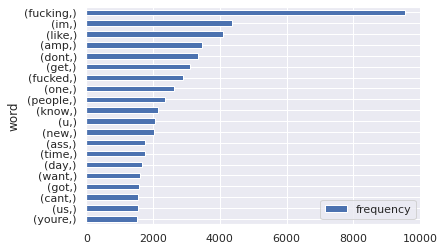

In [0]:
frequency_df.sort_values(by='frequency').plot.barh(x='word',y='frequency')

#Word2vec And Word Embedding

In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [0]:
#word2vec model, default dimension = 100
model = gensim.models.Word2Vec(data.tokenized_text, min_count=1)

In [0]:
#if the text is missing, give 0 with 100 dimensions 
missing=[0]*100
def fun(key):
    try:
        return(model[key])
    except:
        return(missing)

In [0]:
# add a new column of word_embedding
data['word_embedding'] = data['tokenized_text'].apply(fun)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [0]:
# check result for the first row
data['word_embedding'][0]

array([[-7.38849461e-01, -4.31973822e-02,  6.96045041e-01,
        -4.27267522e-01, -5.33629239e-01,  3.81409526e-01,
        -4.92882967e-01,  1.10321037e-01,  2.61350065e-01,
        -2.41047338e-01,  2.61113733e-01,  1.11276731e-01,
        -8.63727033e-02,  5.03551541e-03, -3.16598535e-01,
        -1.16102725e-01,  2.99266368e-01, -1.75800204e-01,
         1.03828982e-01,  4.49328899e-01,  4.37771939e-02,
        -5.48218191e-01, -2.75314540e-01, -1.12887435e-01,
        -1.60544798e-01,  1.73681602e-01, -1.45111308e-01,
         1.46761730e-01, -5.97079694e-01,  6.33506030e-02,
        -9.31764022e-02, -9.43940803e-02, -1.84797645e-01,
         9.45216566e-02, -3.65303666e-03,  6.11409992e-02,
         5.12503624e-01,  1.31212637e-01,  4.41356897e-01,
        -3.43477666e-01,  9.25186835e-03, -1.12630725e-01,
        -4.52331454e-02, -1.52067095e-01,  2.22549085e-02,
        -3.26701164e-01,  6.01202488e-01,  1.93620607e-01,
        -8.76621157e-02,  6.16176605e-01,  3.26883465e-0

In [0]:
# the average of the word embedding vectors 

data['word_embedding'] = data['word_embedding'].map(lambda x: sum(x)/len(x))

In [0]:
## now we have an array of 100 dimensions， check the first row
data['word_embedding'][0]

array([-0.5715971 , -0.04776275,  0.56164837, -0.34569   , -0.4231311 ,
        0.31189713, -0.41577622,  0.16082828,  0.21629226, -0.16666988,
        0.26298475,  0.07437089, -0.0502608 , -0.03063771, -0.26474333,
       -0.12209585,  0.23032606, -0.13587433,  0.08040079,  0.3463918 ,
        0.07423134, -0.382442  , -0.21875572, -0.07867606, -0.10506017,
        0.18337768, -0.11104382,  0.07301284, -0.48729736,  0.03364716,
       -0.09233677, -0.06896046, -0.16926937,  0.097371  , -0.07324015,
        0.06477208,  0.39031234,  0.14950946,  0.29968095, -0.27786472,
       -0.02665375, -0.12367392, -0.00903289, -0.11114194,  0.0341865 ,
       -0.25173056,  0.45279554,  0.1684711 , -0.0831714 ,  0.48617366,
        0.22539327,  0.16795784, -0.157129  ,  0.00706557, -0.15562712,
       -0.24709427, -0.39368153,  0.41997194, -0.12419202,  0.02559605,
        0.21853936, -0.15231754, -0.11706436, -0.13200764, -0.04694084,
        0.38650912, -0.16788016, -0.0664265 ,  0.2279289 ,  0.13

In [0]:
# split the word embedding to 100 columns 
word_embedding_splited = data['word_embedding'].apply(pd.Series)

In [0]:
# find out rows with null value after spliting
null_data = word_embedding_splited[word_embedding_splited.isnull().any(axis=1)]

In [0]:
# 281 row of null values, let's replace all na with 0
# why: we don't want to just drop this rows since tweet of these rows contain no normal content, probabobly spam...
# we will have addiontal useful features for these rows
null_data.shape

(281, 100)

In [0]:
# relace null values with 0
word_embedding_splited.fillna(0, inplace=True)

In [0]:
# add the 100 splited word embedding columns to our data
data = pd.concat([data,word_embedding_splited], axis=1)

In [0]:
#creates an empty list: the for loops through the column where its checks if i is an index value in the data
#if i is in the index then check if the column is an empty list: if so append an empty list
#else apply the word2vec model and convert into a numpy array which is then used to calculate the average based on the columns
vector_lst=[]
for i in range(len(data.tokenized_text_no_stopwords)):
  if i in data.index.values:
    if data.tokenized_text_no_stopwords[i]==[]:
      vector_lst.append([])
    else:
      y=np.array(model[data.tokenized_text_no_stopwords[i]])
      vector_lst.append(y.mean(axis=0))

  else:
    vector_lst.append([])

In [0]:
data["word2vec_mean"]=vector_lst

In [0]:
data.head()

,Tweet,Group,Rating,cleanedTweet,cleanedTweet_no_stopwords,tokenized_text,Unigrams,Bigrams,Trigrams,word_embedding,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,beats by dr. dre urbeats wired in-ear headphon...,spam,4,beats by dr dre urbeats wired inear headphones...,beats dr dre urbeats wired inear headphones white,"[beats, dr, dre, urbeats, wired, inear, headph...","[(beats,), (dr,), (dre,), (urbeats,), (wired,)...","[(beats, dr), (dr, dre), (dre, urbeats), (urbe...","[(beats, dr, dre), (dr, dre, urbeats), (dre, u...","[-0.5715971, -0.047762748, 0.56164837, -0.3456...",-0.571597,-0.047763,0.561648,-0.345690,-0.423131,0.311897,-0.415776,0.160828,0.216292,-0.166670,0.262985,0.074371,-0.050261,-0.030638,-0.264743,-0.122096,0.230326,-0.135874,0.080401,0.346392,0.074231,-0.382442,-0.218756,-0.078676,-0.105060,0.183378,-0.111044,0.073013,-0.487297,0.033647,...,0.218539,-0.152318,-0.117064,-0.132008,-0.046941,0.386509,-0.167880,-0.066427,0.227929,0.134079,-0.190660,0.237116,0.257479,-0.135722,-0.150533,0.473190,0.202741,-0.128565,0.009768,0.114757,0.225361,0.470388,-0.195041,0.129935,-0.313219,0.108077,-0.328301,-0.209386,-0.208363,-0.007648,-0.031451,0.024491,-0.071974,0.180129,0.047495,0.076354,0.009549,-0.101692,-0.180644,-0.327291
1,rt @papapishu: man it would fucking rule if we...,abusive,4,man it would fucking rule if we had a party ...,man would fucking rule party perpetual warfare,"[man, would, fucking, rule, party, perpetual, ...","[(man,), (would,), (fucking,), (rule,), (party...","[(man, would), (would, fucking), (fucking, rul...","[(man, would, fucking), (would, fucking, rule)...","[-1.013616, 0.19553952, 0.82866, -0.76084745, ...",-1.013616,0.195540,0.828660,-0.760847,-0.687571,0.276337,-0.036691,0.162782,0.270586,-0.382212,0.339970,-0.060679,0.097830,0.270976,-0.565468,-0.126950,0.327293,-0.342859,0.494922,0.679732,0.070782,-0.883372,-0.543453,-0.056641,-0.368608,0.341669,-0.416036,0.363228,-0.523083,0.644712,...,0.713200,-0.659447,-0.255098,-0.193747,0.165105,0.283092,-0.246636,-0.144669,-0.214105,0.121911,-0.421978,1.037735,0.132178,-0.346980,-0.238967,0.810425,0.262243,-0.175513,-0.282645,-0.152090,0.258291,0.542141,-0.466973,0.389737,-0.916761,0.088345,-1.031608,0.259064,-0.412143,-0.034130,0.362989,0.007787,-0.337400,0.210564,0.315742,-0.353358,0.232876,0.000748,0.102040,-0.456989
2,it is time to draw close to him &#128591;&#127...,normal,4,it is time to draw close to him father i draw...,time draw close father draw near always,"[time, draw, close, father, draw, near, always]","[(time,), (draw,), (close,), (father,), (draw,...","[(time, draw), (draw, close), (close, father),...","[(time, draw, close), (draw, close, father), (...","[-1.1154531, 0.28595394, 0.8369165, -0.7236578...",-1.115453,0.285954,0.836917,-0.723658,-0.628002,0.270443,-0.392558,0.144726,0.292193,-0.279291,0.438090,0.114026,0.112432,0.329588,-0.684178,-0.266052,0.347155,-0.321962,0.301216,0.589166,0.153283,-0.866997,-0.651879,-0.091724,-0.584164,0.451632,-0.337899,0.419971,-0.332145,0.578781,...,0.580332,-0.676606,-0.437928,-0.130856,0.039125,0.291088,-0.315416,-0.072639,-0.094888,0.083846,-0.665809,0.816074,0.021151,-0.298832,-0.437822,0.840225,0.241682,-0.210498,-0.371842,-0.053177,0.269281,0.717724,-0.422964,0.410997,-0.708310,0.022111,-0.977398,0.061270,-0.130553,0.146679,0.273223,0.037583,-0.401001,0.163513,0.173980,-0.362994,0.037338,-0.197366,0.027337,-0.570969
3,if you notice me start to act different or dis...,normal,5,if you notice me start to act different or dis...,notice start act different distant bc peeped s...,"[notice, start, act, different, distant, bc, p...","[(notice,), (start,), (act,), (different,), (d...","[(notice, start), (start, act), (act, differen...","[(notice, start, act), (start, act, different)...","[-0.9320773, 0.20758137, 0.61519486, -0.585534...",-0.9320

# Part of Speech Extraction

In [0]:
#part of speech extraction
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag


def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [0]:
#new list was created that will then be used to append the data into the dataframe
appended_data=[]

for i in data.cleanedTweet_no_stopwords:
  appended_data.append(preprocess(i))

In [0]:
data["part_speech"]=appended_data

In [0]:
data.head()

,Tweet,Group,Rating,cleanedTweet,cleanedTweet_no_stopwords,tokenized_text,Unigrams,Bigrams,Trigrams,word_embedding,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,part_speech
0,beats by dr. dre urbeats wired in-ear headphon...,spam,4,beats by dr dre urbeats wired inear headphones...,beats dr dre urbeats wired inear headphones white,"[beats, dr, dre, urbeats, wired, inear, headph...","[(beats,), (dr,), (dre,), (urbeats,), (wired,)...","[(beats, dr), (dr, dre), (dre, urbeats), (urbe...","[(beats, dr, dre), (dr, dre, urbeats), (dre, u...","[-0.5715971, -0.047762748, 0.56164837, -0.3456...",-0.571597,-0.047763,0.561648,-0.345690,-0.423131,0.311897,-0.415776,0.160828,0.216292,-0.166670,0.262985,0.074371,-0.050261,-0.030638,-0.264743,-0.122096,0.230326,-0.135874,0.080401,0.346392,0.074231,-0.382442,-0.218756,-0.078676,-0.105060,0.183378,-0.111044,0.073013,-0.487297,0.033647,...,-0.152318,-0.117064,-0.132008,-0.046941,0.386509,-0.167880,-0.066427,0.227929,0.134079,-0.190660,0.237116,0.257479,-0.135722,-0.150533,0.473190,0.202741,-0.128565,0.009768,0.114757,0.225361,0.470388,-0.195041,0.129935,-0.313219,0.108077,-0.328301,-0.209386,-0.208363,-0.007648,-0.031451,0.024491,-0.071974,0.180129,0.047495,0.076354,0.009549,-0.101692,-0.180644,-0.327291,"[(beats, NNS), (dr, VBP), (dre, JJ), (urbeats,..."
1,rt @papapishu: man it would fucking rule if we...,abusive,4,man it would fucking rule if we had a party ...,man would fucking rule party perpetual warfare,"[man, would, fucking, rule, party, perpetual, ...","[(man,), (would,), (fucking,), (rule,), (party...","[(man, would), (would, fucking), (fucking, rul...","[(man, would, fucking), (would, fucking, rule)...","[-1.013616, 0.19553952, 0.82866, -0.76084745, ...",-1.013616,0.195540,0.828660,-0.760847,-0.687571,0.276337,-0.036691,0.162782,0.270586,-0.382212,0.339970,-0.060679,0.097830,0.270976,-0.565468,-0.126950,0.327293,-0.342859,0.494922,0.679732,0.070782,-0.883372,-0.543453,-0.056641,-0.368608,0.341669,-0.416036,0.363228,-0.523083,0.644712,...,-0.659447,-0.255098,-0.193747,0.165105,0.283092,-0.246636,-0.144669,-0.214105,0.121911,-0.421978,1.037735,0.132178,-0.346980,-0.238967,0.810425,0.262243,-0.175513,-0.282645,-0.152090,0.258291,0.542141,-0.466973,0.389737,-0.916761,0.088345,-1.031608,0.259064,-0.412143,-0.034130,0.362989,0.007787,-0.337400,0.210564,0.315742,-0.353358,0.232876,0.000748,0.102040,-0.456989,"[(man, NN), (would, MD), (fucking, VB), (rule,..."
2,it is time to draw close to him &#128591;&#127...,normal,4,it is time to draw close to him father i draw...,time draw close father draw near always,"[time, draw, close, father, draw, near, always]","[(time,), (draw,), (close,), (father,), (draw,...","[(time, draw), (draw, close), (close, father),...","[(time, draw, close), (draw, close, father), (...","[-1.1154531, 0.28595394, 0.8369165, -0.7236578...",-1.115453,0.285954,0.836917,-0.723658,-0.628002,0.270443,-0.392558,0.144726,0.292193,-0.279291,0.438090,0.114026,0.112432,0.329588,-0.684178,-0.266052,0.347155,-0.321962,0.301216,0.589166,0.153283,-0.866997,-0.651879,-0.091724,-0.584164,0.451632,-0.337899,0.419971,-0.332145,0.578781,...,-0.676606,-0.437928,-0.130856,0.039125,0.291088,-0.315416,-0.072639,-0.094888,0.083846,-0.665809,0.816074,0.021151,-0.298832,-0.437822,0.840225,0.241682,-0.210498,-0.371842,-0.053177,0.269281,0.717724,-0.422964,0.410997,-0.708310,0.022111,-0.977398,0.061270,-0.130553,0.146679,0.273223,0.037583,-0.401001,0.163513,0.173980,-0.362994,0.037338,-0.197366,0.027337,-0.570969,"[(time, NN), (draw, VBZ), (close, RB), (father..."
3,if you notice me start to act different or dis...,normal,5,if you notice me start to act different or dis...,notice start act different distant bc peeped s...,"[notice, start, act, different, distant, bc, p...","[(notice,), (start,), (act,), (different,), (d...","[(notice, start), (start

## PART OF SPEECH COUNT

In [0]:
# define some functions to get the number of different category of POS

def findNNS(row):
  count = 0
  for each in row:
    if each[1] in ['NNS','NN','NNP','NNPS',]:
      count+=1
  return count
data['NN'] = data.part_speech.apply(findNNS)

def findCC(row):
  count = 0
  for each in row:
    if each[1] in ['CC','CD']:
      count+=1
  return count
data['CC'] = data.part_speech.apply(findCC)

def findDT(row):
  count = 0
  for each in row:
    if each[1] == 'DT':
      count+=1
  return count
data['DT'] = data.part_speech.apply(findDT)

def findEX(row):
  count = 0
  for each in row:
    if each[1] == 'EX':
      count+=1
  return count
data['EX'] = data.part_speech.apply(findEX)

def findFW(row):
  count = 0
  for each in row:
    if each[1] == 'FW':
      count+=1
  return count
data['FW'] = data.part_speech.apply(findFW)

def findIN(row):
  count = 0
  for each in row:
    if each[1] == 'IN':
      count+=1
  return count
data['IN'] = data.part_speech.apply(findIN)

def findJJ(row):
  count = 0
  for each in row:
    if each[1] in ['JJ','JJR']:
      count+=1
  return count
data['JJ'] = data.part_speech.apply(findJJ)

def findLS(row):
  count = 0
  for each in row:
    if each[1] == 'LS':
      count+=1
  return count
data['LS'] = data.part_speech.apply(findLS)

def findMD(row):
  count = 0
  for each in row:
    if each[1] == 'MD':
      count+=1
  return count
data['MD'] = data.part_speech.apply(findMD)

def findPP(row):
  count = 0
  for each in row:
    if each[1] in ['PDT','POS','PRP','PRP$']:
      count+=1
  return count
data['PP'] = data.part_speech.apply(findPP)

def findRB(row):
  count = 0
  for each in row:
    if each[1] in ['RB','RBR','RBS','RP']:
      count+=1
  return count
data['RB'] = data.part_speech.apply(findRB)

def findSYM(row):
  count = 0
  for each in row:
    if each[1] == 'SYM':
      count+=1
  return count
data['SYM'] = data.part_speech.apply(findSYM)

def findTO(row):
  count = 0
  for each in row:
    if each[1] == 'TO':
      count+=1
  return count
data['TO'] = data.part_speech.apply(findTO)

def findUH(row):
  count = 0
  for each in row:
    if each[1] == 'UH':
      count+=1
  return count
data['UH'] = data.part_speech.apply(findUH)

def findVB(row):
  count = 0
  for each in row:
    if each[1] in ['VB','VBD','VBG','VBN','VBP','VBZ']:
      count+=1
  return count
data['VB'] = data.part_speech.apply(findVB)

def findWB(row):
  count = 0
  for each in row:
    if each[1] in ['WDT','WP','WP$','WRB']:
      count+=1
  return count
data['WB'] = data.part_speech.apply(findWB)



In [0]:
data.head()

,Tweet,Group,Rating,cleanedTweet,cleanedTweet_no_stopwords,tokenized_text,Unigrams,Bigrams,Trigrams,word_embedding,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,part_speech,NN,CC,DT,EX,FW,IN,JJ,LS,MD,PP,RB,SYM,TO,UH,VB,WB
0,beats by dr. dre urbeats wired in-ear headphon...,spam,4,beats by dr dre urbeats wired inear headphones...,beats dr dre urbeats wired inear headphones white,"[beats, dr, dre, urbeats, wired, inear, headph...","[(beats,), (dr,), (dre,), (urbeats,), (wired,)...","[(beats, dr), (dr, dre), (dre, urbeats), (urbe...","[(beats, dr, dre), (dr, dre, urbeats), (dre, u...","[-0.5715971, -0.047762748, 0.56164837, -0.3456...",-0.571597,-0.047763,0.561648,-0.345690,-0.423131,0.311897,-0.415776,0.160828,0.216292,-0.166670,0.262985,0.074371,-0.050261,-0.030638,-0.264743,-0.122096,0.230326,-0.135874,0.080401,0.346392,0.074231,-0.382442,-0.218756,-0.078676,-0.105060,0.183378,-0.111044,0.073013,-0.487297,0.033647,...,-0.128565,0.009768,0.114757,0.225361,0.470388,-0.195041,0.129935,-0.313219,0.108077,-0.328301,-0.209386,-0.208363,-0.007648,-0.031451,0.024491,-0.071974,0.180129,0.047495,0.076354,0.009549,-0.101692,-0.180644,-0.327291,"[(beats, NNS), (dr, VBP), (dre, JJ), (urbeats,...",3,0,0,0,0,0,3,0,0,0,0,0,0,0,2,0
1,rt @papapishu: man it would fucking rule if we...,abusive,4,man it would fucking rule if we had a party ...,man would fucking rule party perpetual warfare,"[man, would, fucking, rule, party, perpetual, ...","[(man,), (would,), (fucking,), (rule,), (party...","[(man, would), (would, fucking), (fucking, rul...","[(man, would, fucking), (would, fucking, rule)...","[-1.013616, 0.19553952, 0.82866, -0.76084745, ...",-1.013616,0.195540,0.828660,-0.760847,-0.687571,0.276337,-0.036691,0.162782,0.270586,-0.382212,0.339970,-0.060679,0.097830,0.270976,-0.565468,-0.126950,0.327293,-0.342859,0.494922,0.679732,0.070782,-0.883372,-0.543453,-0.056641,-0.368608,0.341669,-0.416036,0.363228,-0.523083,0.644712,...,-0.175513,-0.282645,-0.152090,0.258291,0.542141,-0.466973,0.389737,-0.916761,0.088345,-1.031608,0.259064,-0.412143,-0.034130,0.362989,0.007787,-0.337400,0.210564,0.315742,-0.353358,0.232876,0.000748,0.102040,-0.456989,"[(man, NN), (would, MD), (fucking, VB), (rule,...",4,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,it is time to draw close to him &#128591;&#127...,normal,4,it is time to draw close to him father i draw...,time draw close father draw near always,"[time, draw, close, father, draw, near, always]","[(time,), (draw,), (close,), (father,), (draw,...","[(time, draw), (draw, close), (close, father),...","[(time, draw, close), (draw, close, father), (...","[-1.1154531, 0.28595394, 0.8369165, -0.7236578...",-1.115453,0.285954,0.836917,-0.723658,-0.628002,0.270443,-0.392558,0.144726,0.292193,-0.279291,0.438090,0.114026,0.112432,0.329588,-0.684178,-0.266052,0.347155,-0.321962,0.301216,0.589166,0.153283,-0.866997,-0.651879,-0.091724,-0.584164,0.451632,-0.337899,0.419971,-0.332145,0.578781,...,-0.210498,-0.371842,-0.053177,0.269281,0.717724,-0.422964,0.410997,-0.708310,0.022111,-0.977398,0.061270,-0.130553,0.146679,0.273223,0.037583,-0.401001,0.163513,0.173980,-0.362994,0.037338,-0.197366,0.027337,-0.570969,"[(time, NN), (draw, VBZ), (close, RB), (father...",2,0,0,0,0,1,1,0,0,0,2,0,0,0,1,0
3,if you notice me start to act different or dis...,normal,5,if you notice me start to act different or dis...,notice start act different distant bc peeped s...,"[notice, start, act, different, distant, bc, p...","[(notice,), (start,), (act,), (different,), (d...","[(notice, start), (start, act), (act, differen...","[(notice, start, act), (start, act, different)...","[-0.9320773, 0.20758137, 0.61519486, -0.585534...",-0.932077,0.207581,0.615195,-0.585535,-0.551250,0.271743,-0.236159,0.109674,0.231442,-0.283496,0.283489,0.045507,0.054499,0.237514,-0.531740,-0.099634,0.223169,-0.274595,0.268880,0.511285,0.069606,-0.639202,-0.481994,-0.034095,-0.3

# **Sentiment Analysis**

In [0]:
# since we already have many features in data, let's use different variables here and concatenate data at final stage

data1 = data[['cleanedTweet','Group','Rating']]


In [0]:
data1.head()

,cleanedTweet,Group,Rating
0,beats by dr dre urbeats wired inear headphones...,spam,4
1,man it would fucking rule if we had a party ...,abusive,4
2,it is time to draw close to him father i draw...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,forget unfollowers i believe in growing new f...,normal,3


In [0]:
# count rows of different groups
# put this finding into the report
print('the shape of spam tweet dataset is: ', data1[data1.Group == 'spam'].shape)
print('the shape of hateful tweet dataset is: ', data1[data1.Group == 'hateful'].shape)
print('the shape of abusive tweet dataset is: ', data1[data1.Group == 'abusive'].shape)
print('the shape of normal tweet dataset is: ', data1[data1.Group == 'normal'].shape)

the shape of spam tweet dataset is:  (9226, 3)
the shape of hateful tweet dataset is:  (3210, 3)
the shape of abusive tweet dataset is:  (17806, 3)
the shape of normal tweet dataset is:  (35293, 3)


In [0]:
# We will use vader sentiment analysis here considering short text phrases
!pip install vaderSentiment
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

     |████████████████████████████████| 133kB 2.9MB/s 


In [0]:
#Define the sentiment measurement 

def measure_sentiment(textval):
  sentObj = SentimentIntensityAnalyzer() 
  sentimentvals = sentObj.polarity_scores(textval)
  if sentimentvals['compound']>=0.5: 
    return("Positive")
  elif sentimentvals['compound']<=-0.5:  
    return("Negative")
  else:
    return("Neutral")

In [0]:
# Perform sentiment analysis for the whole tweets dataset
# alert: this code takes 5-10mins to run...
# Never run this for second time, you will be frustrating
# if you don't want to waste the time, take the folllowing suggestion in the next chunk 👇

result = []  
for i in data1["cleanedTweet"]:
  result.append(measure_sentiment(i))              
data1["sentiment"] = result

In [0]:
# suggest: save file at this moment for future use
# we can just take the downloaded file to do the future work
# remember put the file in your google drive
from google.colab import files
data1.to_csv('data1.csv')
files.download('data1.csv')

In [0]:
# #reads the data1 back 
# #remember put the downloaded data1 into your googlel drive first!
data1 = pd.read_csv('/content/drive/My Drive/data1.csv',header=0)

In [0]:
#Check sentiment distribution for each Group

In [0]:
#sentiment distribution for spam tweets dataset
data1[data1.Group=='spam'].groupby(['sentiment'])['cleanedTweet'].count().sort_values()

sentiment
Negative     515
Positive    2301
Neutral     6410
Name: cleanedTweet, dtype: int64

In [0]:
#sentiment distribution for abusive tweets dataset
data1[data1.Group=='abusive'].groupby(['sentiment'])['cleanedTweet'].count().sort_values()

sentiment
Positive     734
Neutral     7740
Negative    9332
Name: cleanedTweet, dtype: int64

In [0]:
#sentiment distribution for normal tweets dataset
data1[data1.Group=='normal'].groupby(['sentiment'])['cleanedTweet'].count().sort_values()

sentiment
Negative     3745
Positive     8889
Neutral     22659
Name: cleanedTweet, dtype: int64

In [0]:
#sentiment distribution for hateful tweets dataset
data1[data1.Group=='hateful'].groupby(['sentiment'])['cleanedTweet'].count().sort_values()

sentiment
Positive     179
Neutral     1247
Negative    1784
Name: cleanedTweet, dtype: int64

In [0]:
# Visualization 1: bar plots for the sentimen distribution for each Group

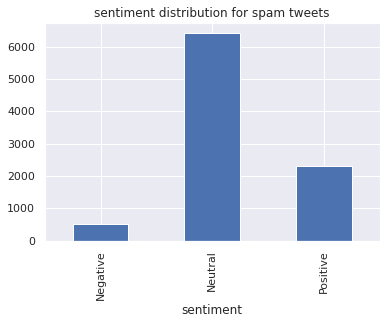

In [0]:
data1[data1.Group=='spam'].groupby(['sentiment'])['cleanedTweet'].count().plot.bar(title='sentiment distribution for spam tweets')

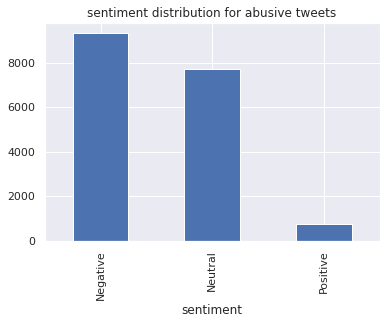

In [0]:
data1[data1.Group=='abusive'].groupby(['sentiment'])['cleanedTweet'].count().plot.bar(title='sentiment distribution for abusive tweets')

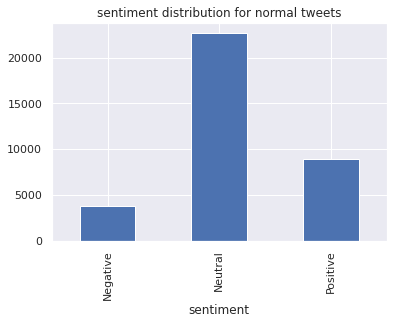

In [0]:
data1[data1.Group=='normal'].groupby(['sentiment'])['cleanedTweet'].count().plot.bar(title='sentiment distribution for normal tweets')

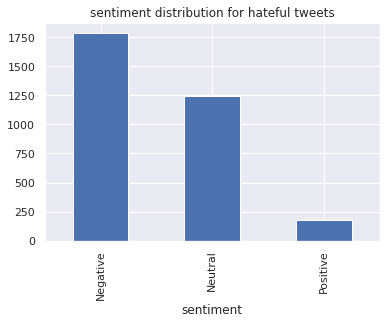

In [0]:
data1[data1.Group=='hateful'].groupby(['sentiment'])['cleanedTweet'].count().plot.bar(title='sentiment distribution for hateful tweets')

In [0]:
# Visualization 2: Bar plot for sentiment analysis grouped by rating(only show rating ≤ 5, when rating >5, values too low)
# why do this: to see whether the number of rating people has influence on the decision
# and the result is yes, that's why we want a machine learning model to do the classification, not human
# we'll take off the rating column in the modeling part, unnecessary

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


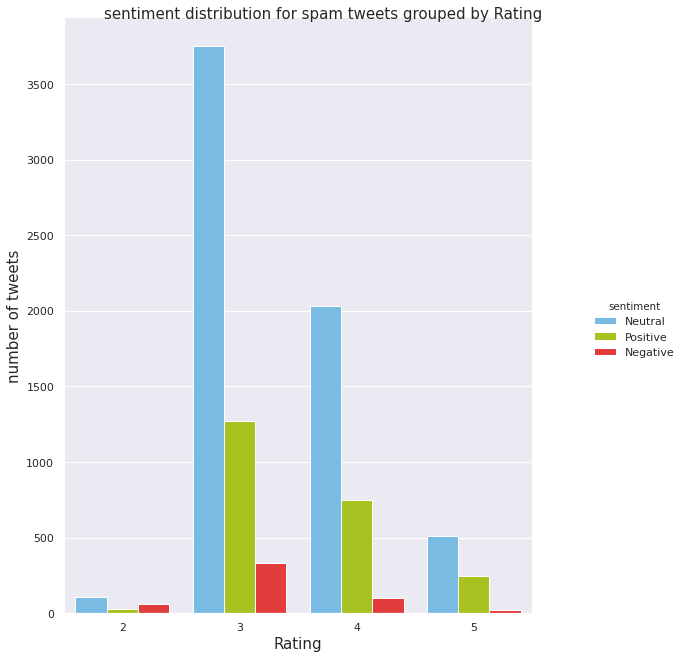

In [0]:

f = sns.factorplot(x="Rating", hue="sentiment", 
                    data=data1[data1.Group=='spam'].loc[data1.Rating<=5], kind="count", 
                    palette={"Negative": "#FE2020", 
                             "Positive": "#BADD07", 
                             "Neutral": "#68BFF5"})

f.fig.suptitle('sentiment distribution for spam tweets grouped by Rating', fontsize= 15)
f.fig.set_size_inches(10, 10)
f.set_xlabels('Rating', fontsize= 15)
f.set_ylabels('number of tweets', fontsize= 15)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


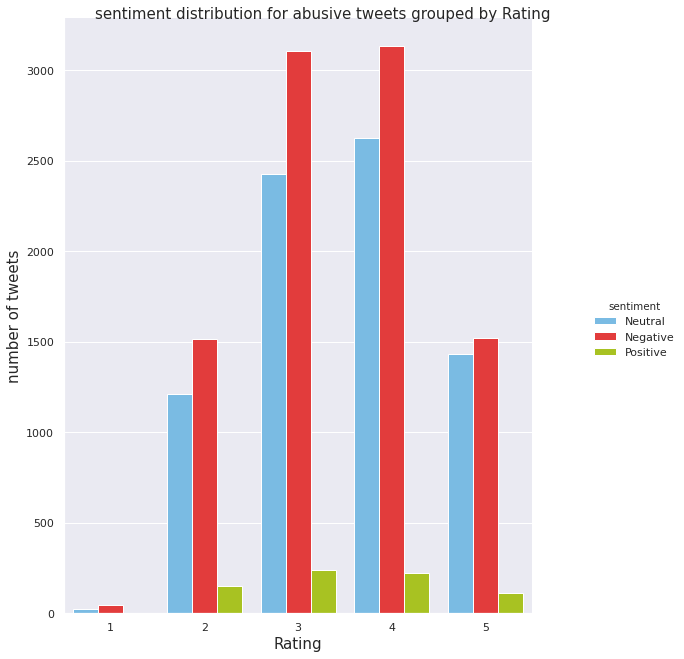

In [0]:
f = sns.factorplot(x="Rating", hue="sentiment", 
                    data=data1[data1.Group=='abusive'].loc[data1.Rating<=5], kind="count", 
                    palette={"Negative": "#FE2020", 
                             "Positive": "#BADD07", 
                             "Neutral": "#68BFF5"})

f.fig.suptitle('sentiment distribution for abusive tweets grouped by Rating', fontsize= 15)
f.fig.set_size_inches(10, 10)
f.set_xlabels('Rating', fontsize= 15)
f.set_ylabels('number of tweets', fontsize= 15)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


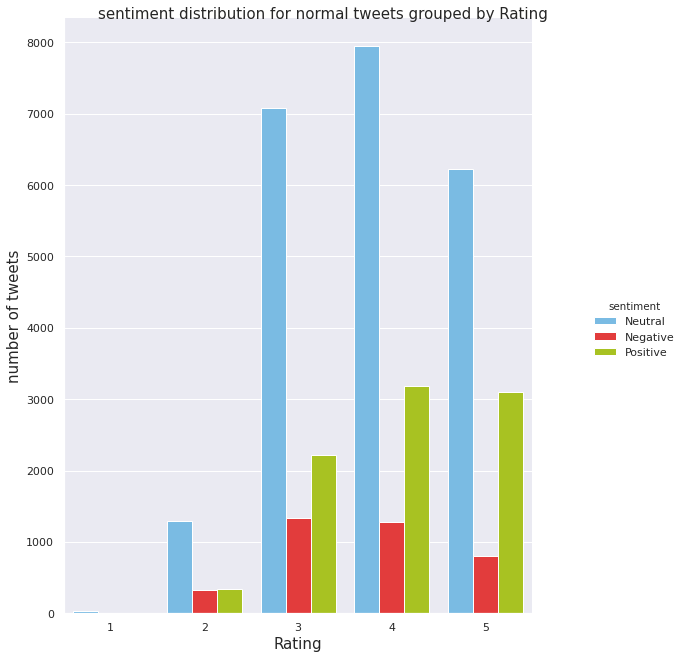

In [0]:
f = sns.factorplot(x="Rating", hue="sentiment", 
                    data=data1[data1.Group=='normal'].loc[data1.Rating<=5], kind="count", 
                    palette={"Negative": "#FE2020", 
                             "Positive": "#BADD07", 
                             "Neutral": "#68BFF5"})

f.fig.suptitle('sentiment distribution for normal tweets grouped by Rating', fontsize= 15)
f.fig.set_size_inches(10, 10)
f.set_xlabels('Rating', fontsize= 15)
f.set_ylabels('number of tweets', fontsize= 15)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


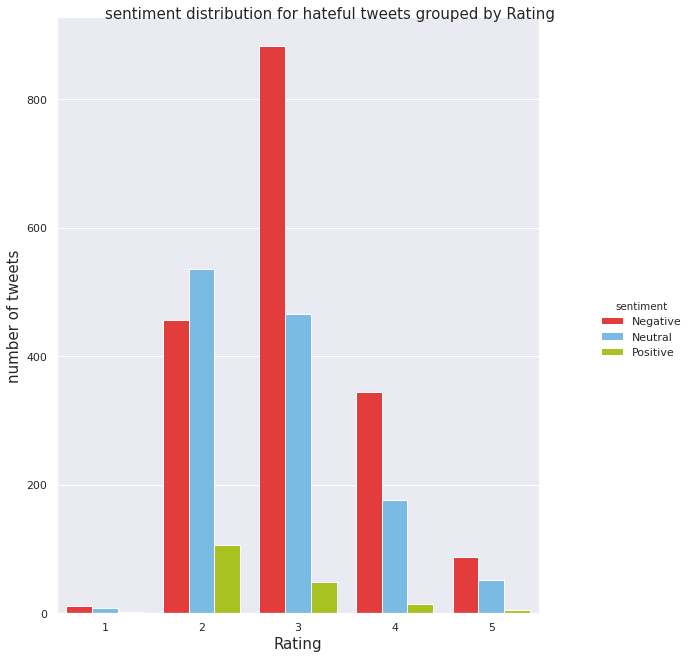

In [0]:
f = sns.factorplot(x="Rating", hue="sentiment", 
                    data=data1[data1.Group=='hateful'].loc[data1.Rating<=5], kind="count", 
                    palette={"Negative": "#FE2020", 
                             "Positive": "#BADD07", 
                             "Neutral": "#68BFF5"})

f.fig.suptitle('sentiment distribution for hateful tweets grouped by Rating', fontsize= 15)
f.fig.set_size_inches(10, 10)
f.set_xlabels('Rating', fontsize= 15)
f.set_ylabels('number of tweets', fontsize= 15)

In [0]:
# Visualization 3: Bar plot for sentiment analysis grouped by Group

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


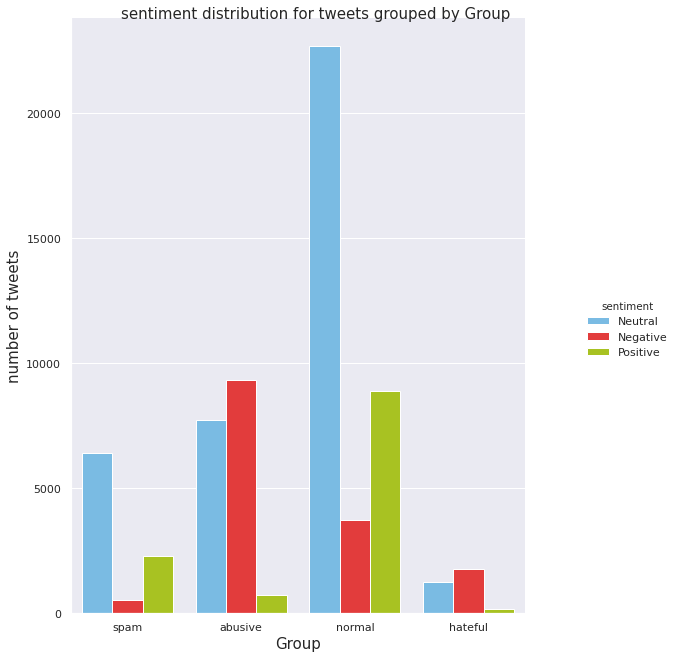

In [0]:
f = sns.factorplot(x="Group", hue="sentiment", 
                    data=data1, kind="count", 
                    palette={"Negative": "#FE2020", 
                             "Positive": "#BADD07", 
                             "Neutral": "#68BFF5"})

f.fig.suptitle('sentiment distribution for tweets grouped by Group', fontsize= 15)
f.fig.set_size_inches(10, 10)
f.set_xlabels('Group', fontsize= 15)
f.set_ylabels('number of tweets', fontsize= 15)

# **LIWC** **Analysis** 

In [0]:
# use cleanedTweet to do the get the LIWC
data1.head()

,Unnamed: 0,cleanedTweet,Group,Rating,sentiment
0,0,beats by dr dre urbeats wired inear headphones...,spam,4,Neutral
1,1,man it would fucking rule if we had a party ...,abusive,4,Neutral
2,2,it is time to draw close to him father i draw...,normal,4,Neutral
3,3,if you notice me start to act different or dis...,normal,5,Neutral
4,4,forget unfollowers i believe in growing new f...,normal,3,Neutral


In [0]:
# get tokens
data1.tokens = data1['cleanedTweet'].apply(word_tokenize) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [0]:
# copy the langs folder to "/content"

!cp "/content/drive/My Drive/langs" -r "/content"

In [0]:
# cp the python module to "/content"
!cp "/content/drive/My Drive/find_liwc_topics.py" -r "/content"

In [0]:
#import the LIWC module and define liwc, find the liwc categories for every tweet
import find_liwc_topics
from find_liwc_topics import LIWCParser

LIWC =[]
for tokens in data1.tokens:
  liwc = LIWCParser("LIWC2007_English080730.dic")
  LIWC.append(liwc.parseDoc(tokens))

data1['LIWC'] = LIWC

In [53]:
data1.to_csv('data1.csv')
files.download('data1.csv')

NameError: ignored

### **Count number of mentions, hashtags, and urls**

In [0]:
# reference code

data['URLs'] = data['Tweet'].str.findall(r'(http\S+|www\S+)').apply(','.join)

## **combine all the features together**

# **Modeling and accuracy**